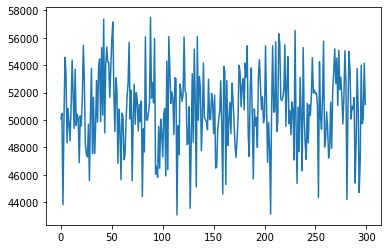

In [25]:
import math
import scipy.stats
import numpy as np
import random
import matplotlib.pyplot as plt

def generate_timeseries(
    N=300, period=7, 
    magnitude_constant=0, 
    scaling_constant=1.5, 
    period_scaling_constant=10
):
    timeseries = []
    for i in range(N):
        periodicity = math.sin(i * period)
        randomized_scaling = random.random() * scaling_constant
        random_noise = math.sin(random.random() * period_scaling_constant)
        timeseries.append(
            periodicity + magnitude_constant + (randomized_scaling * random_noise)
        )
    return np.array(timeseries)
        

time_series = generate_timeseries(
    N=300, period=7, 
    magnitude_constant=50000, 
    scaling_constant=7500, 
    period_scaling_constant=10
)

plt.plot(time_series)

In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

def lag_data(time_series, num_lags=7):
    df = pd.DataFrame(time_series)
    df["series"] = df[0]
    df = df.drop(0, axis=1)
    for lag in range(1, num_lags+1):
        df[f"lag(counts, {lag})"] = df["series"].shift(lag)
    indices_to_drop = list(range(num_lags))
    return df.drop(indices_to_drop, axis=0)

experiments = []
for i in range(5):
    generate_timeseries(
        N=300, period=7, 
        magnitude_constant=50000, 
        scaling_constant=7500, 
        period_scaling_constant=10
    )

    df = lag_data(time_series)
    cols = df.columns.tolist()
    cols.remove("series")
    y = df["series"]
    X = df[cols]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, random_state=256, test_size=0.1
    )
    gbr = GradientBoostingRegressor(
        loss="squared_error",
        learning_rate=0.3,
        n_estimators=1000
    )
    gbr.fit(X_train, y_train)
    
    error_num_estimators = []
    predictions = gbr.staged_predict(X_test)
    for num_estimators, y_pred in enumerate(predictions):
        error = mean_squared_error(y_test, y_pred)
        error_num_estimators.append(
            [num_estimators+1, error]
        )
    experiments.append(error_num_estimators)

In [51]:
for experiment in experiments:
    print(sorted(experiment, key=lambda t: t[1])[0])

[1, 7299958.694551708]
[1, 7299958.694551708]
[1, 7299958.694551708]
[1, 7299958.694551708]
[1, 7299958.694551708]


In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

def lag_data(time_series, num_lags=7):
    df = pd.DataFrame(time_series)
    df["series"] = df[0]
    df = df.drop(0, axis=1)
    for lag in range(1, num_lags+1):
        df[f"lag(counts, {lag})"] = df["series"].shift(lag)
    indices_to_drop = list(range(num_lags))
    return df.drop(indices_to_drop, axis=0)

experiments = []
for max_depth in range(1, 6):
    for min_samples_split in range(2, 7):
        generate_timeseries(
            N=300, period=7, 
            magnitude_constant=50000, 
            scaling_constant=7500, 
            period_scaling_constant=10
        )

        df = lag_data(time_series)
        cols = df.columns.tolist()
        cols.remove("series")
        y = df["series"]
        X = df[cols]
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, random_state=256, test_size=0.1
        )
        gbr = GradientBoostingRegressor(
            loss="squared_error",
            learning_rate=0.3,
            n_estimators=1000,
            max_depth=max_depth,
            min_samples_split=min_samples_split
        )
        gbr.fit(X_train, y_train)

        error_num_estimators = []
        predictions = gbr.staged_predict(X_test)
        for num_estimators, y_pred in enumerate(predictions):
            error = mean_squared_error(y_test, y_pred)
            error_num_estimators.append([
                    num_estimators+1, 
                    error, 
                    max_depth, 
                    min_samples_split
                ])
        experiments.append(error_num_estimators)

In [57]:
for experiment in experiments:
    for instance in sorted(experiment, key=lambda t: t[1])[0:5]:
        print(instance)
    print()
    print()

[1, 7260754.674798554, 1, 2]
[2, 7476120.455488864, 1, 2]
[5, 7587262.235881637, 1, 2]
[6, 7651507.388971242, 1, 2]
[7, 7661951.466417414, 1, 2]


[1, 7260754.674798554, 1, 3]
[2, 7476120.455488864, 1, 3]
[5, 7587262.235881637, 1, 3]
[6, 7651507.388971242, 1, 3]
[7, 7661951.466417414, 1, 3]


[1, 7260754.674798554, 1, 4]
[2, 7476120.455488864, 1, 4]
[5, 7587262.235881637, 1, 4]
[6, 7651507.388971242, 1, 4]
[7, 7661951.466417414, 1, 4]


[1, 7260754.674798554, 1, 5]
[2, 7476120.455488864, 1, 5]
[5, 7587262.235881637, 1, 5]
[6, 7651507.388971242, 1, 5]
[7, 7661951.466417414, 1, 5]


[1, 7260754.674798554, 1, 6]
[2, 7476120.455488864, 1, 6]
[5, 7587262.235881637, 1, 6]
[6, 7651507.388971242, 1, 6]
[7, 7661951.466417414, 1, 6]


[25, 6500477.602006518, 2, 2]
[29, 6556047.255056514, 2, 2]
[28, 6565620.006413741, 2, 2]
[24, 6579001.970234868, 2, 2]
[26, 6617995.3761084, 2, 2]


[1, 7284566.428839876, 2, 3]
[13, 7475340.1821214305, 2, 3]
[3, 7544121.870668981, 2, 3]
[15, 7561981.932631567, 2,

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_squared_error

def lag_data(time_series, num_lags=7):
    df = pd.DataFrame(time_series)
    df["series"] = df[0]
    df = df.drop(0, axis=1)
    for lag in range(1, num_lags+1):
        df[f"lag(counts, {lag})"] = df["series"].shift(lag)
    indices_to_drop = list(range(num_lags))
    return df.drop(indices_to_drop, axis=0)

experiments = []
for max_depth in range(1, 6):
    for min_samples_leaf in range(5, 50, 5):
        generate_timeseries(
            N=300, period=7, 
            magnitude_constant=50000, 
            scaling_constant=7500, 
            period_scaling_constant=10
        )

        df = lag_data(time_series)
        cols = df.columns.tolist()
        cols.remove("series")
        y = df["series"]
        X = df[cols]
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, random_state=256, test_size=0.1
        )
        gbr = HistGradientBoostingRegressor(
            loss="squared_error",
            learning_rate=0.3,
            max_iter=1000,
            max_depth=max_depth,
            n_iter_no_change=100,
            early_stopping=False,
            min_samples_leaf=min_samples_leaf
        )
        gbr.fit(X_train, y_train)

        error_num_estimators = []
        predictions = gbr.staged_predict(X_test)
        for num_estimators, y_pred in enumerate(predictions):
            error = mean_squared_error(y_test, y_pred)
            error_num_estimators.append([
                    num_estimators+1, 
                    error, 
                    max_depth, 
                    min_samples_leaf
                ])
        experiments.append(error_num_estimators)

In [61]:
for experiment in experiments:
    for instance in sorted(experiment, key=lambda t: t[1])[0:5]:
        print(instance)
    print()
    print()

[1, 7260754.673023423, 1, 5]
[196, 7362452.865321047, 1, 5]
[198, 7403630.984918275, 1, 5]
[3, 7404075.075459665, 1, 5]
[195, 7412389.022080838, 1, 5]


[1, 7260754.673023423, 1, 10]
[3, 7404075.075459665, 1, 10]
[23, 7411208.558462122, 1, 10]
[30, 7412294.525437009, 1, 10]
[26, 7426595.353295181, 1, 10]


[1, 7260754.673023423, 1, 15]
[28, 7377131.161872207, 1, 15]
[3, 7404075.075459665, 1, 15]
[23, 7412279.719318741, 1, 15]
[22, 7428629.868337874, 1, 15]


[1, 7260754.673023423, 1, 20]
[28, 7377131.161872207, 1, 20]
[3, 7404075.075459665, 1, 20]
[23, 7412279.719318741, 1, 20]
[22, 7428629.868337874, 1, 20]


[1, 7260754.673023423, 1, 25]
[28, 7381772.004941498, 1, 25]
[3, 7404075.075459665, 1, 25]
[23, 7416257.88974437, 1, 25]
[22, 7432748.7733386615, 1, 25]


[1, 7260754.673023423, 1, 30]
[3, 7404075.075459665, 1, 30]
[4, 7463260.640118454, 1, 30]
[2, 7476120.450802007, 1, 30]
[22, 7512708.376480712, 1, 30]


[1, 7260754.673023423, 1, 35]
[3, 7404075.075459665, 1, 35]
[4, 7463260.64